step 1. 필요한 라이브러리, Ollama 설치

In [ ]:
!pip install huggingface-hub fastapi langserve langchain_core langchain_ollama uvicorn sse_starlette python-multipart pyngrok
!curl -fsSL https://ollama.com/install.sh | sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


step 2. EXAONE-3.5 gguf 다운

In [ ]:
!huggingface-cli download \
  LGAI-EXAONE/EXAONE-3.5-32B-Instruct-GGUF \
  EXAONE-3.5-32B-Instruct-Q5_K_M.gguf \
  --local-dir /content/model \
  --local-dir-use-symlinks False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:139: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
EXAONE-3.5-32B-Instruct-Q5_K_M.gguf: 100% 22.7G/22.7G [09:22<00:00, 40.3MB/s]
Download complete. Moving file to /content/model/EXAONE-3.5-32B-Instruct-Q5_K_M.gguf
/content/model/EXAONE-3.5-32B-Instruct-Q5_K_M.gguf


step 3. Modelfile 생성

In [ ]:
file_content = '''# Model path (choose appropriate GGUF weights on your own)
FROM ./EXAONE-3.5-32B-Instruct-Q5_K_M.gguf

# Parameter values
PARAMETER stop "[|endofturn|]"
PARAMETER temperature 1.0
PARAMETER repeat_penalty 1.0
# PARAMETER num_ctx 32768  # if you need a long context

# Chat template
TEMPLATE """{{- range $i, $_ := .Messages }}
{{- $last := eq (len (slice $.Messages $i)) 1 -}}
{{ if eq .Role "system" }}[|system|]{{ .Content }}[|endofturn|]
{{ continue }}
{{ else if eq .Role "user" }}[|user|]{{ .Content }}
{{ else if eq .Role "assistant" }}[|assistant|]{{ .Content }}[|endofturn|]
{{ end }}
{{- if and (ne .Role "assistant") $last }}[|assistant|]{{ end }}
{{- end -}}"""

# System prompt
SYSTEM """You are EXAONE model from LG AI Research, a helpful assistant."""

# License
LICENSE """EXAONE AI Model License Agreement 1.1 - NC """'''

# 파일 생성 및 내용 쓰기
with open("/content/model/Modelfile", "w") as file:
    file.write(file_content)

step 4. Ollama 실행

In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


step 5. EXAONE-3.5-32B(32B-Instruct-Q5_K_M.gguf) 모델 생성

In [ ]:
import time

time.sleep(5)

!ollama create exaone-3.5-32B -f /content/model/Modelfile

transferring model data ⠙ transferring model data ⠹ transferring model data ⠸ transferring model data ⠼ transferring model data ⠴ transferring model data ⠦ transferring model data ⠧ transferring model data ⠇ transferring model data ⠏ transferring model data ⠋ transferring model data ⠙ transferring model data ⠹ transferring model data ⠸ transferring model data ⠼ transferring model data ⠴ transferring model data ⠦ transferring model data ⠧ transferring model data ⠇ transferring model data ⠏ transferring model data ⠋ transferring model data ⠙ transferring model data ⠹ transferring model data ⠸ transferring model data ⠼ transferring model data ⠴ transferring model data ⠦ transferring model data ⠧ transferring model data ⠇ transferring model data ⠏ transferring model data ⠋ transferring model data ⠙ transferring model data ⠹ transferring model data ⠸ transferring model data ⠼ transferring model data ⠴ transferring model data ⠦ transferring model data ⠧ transferring model data ⠇ transferring

step 6. 모델 생성 확인

In [ ]:
!ollama list

NAME                     ID              SIZE     MODIFIED               
exaone-3.5-32B:latest    86fa90f2e399    22 GB    Less than a second ago    


step 7. EXAONE-3.5-32B 모델 사용

- 모델이 상대적으로 크기에 T4 기준 짧은 답변
  - 질문
    - 미에로화이바 맛은 어때?
  - 답변
    - 미에로화이바는 주로 **달고 상큼한 과일 맛**으로 알려져 있습니다. 정확한 맛은 **사과**나 **포도**와 비슷하게 느껴지기도 하는데, 상큼하고 달콤한 풍미가 특징입니다. 하지만 개인의 미각에 따라 약간의 차이가 있을 수 있습니다. 직접 맛보시는 것이 가장 정확할 것 같습니다!
- 6분 가량 소요됨



In [ ]:
'!pip install ollama'

In [ ]:
'''import ollama

response = ollama.chat(model='exaone-3.5-32B:latest',
                     messages=[{
                         'role':'user',
                         'content':'미에로화이바 맛은 어때?'}],
                     stream=True)

for chunk in response:
    print(chunk['message']['content'], end='', flush=True)'''

미에로화이바는 주로 **달고 상큼한 과일 맛**으로 알려져 있습니다. 정확한 맛은 **사과**나 **포도**와 비슷하게 느껴지기도 하는데, 상큼하고 달콤한 풍미가 특징입니다. 하지만 개인의 미각에 따라 약간의 차이가 있을 수 있습니다. 직접 맛보시는 것이 가장 정확할 것 같습니다!

step 8. langserve으로 챗봇 서빙

In [ ]:
file_content='''from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# LangChain이 지원하는 다른 채팅 모델을 사용합니다. 여기서는 Ollama를 사용합니다.
llm = ChatOllama(model="exaone-3.5-32B:latest")

# 프롬프트 설정
prompt = ChatPromptTemplate.from_template("{topic} 에 대하여 간략히 설명해 줘.")

# LangChain 표현식 언어 체인 구문을 사용합니다.
chain = prompt | llm | StrOutputParser()'''

# 파일 생성 및 내용 쓰기
with open("/content/chain.py", "w") as file:
    file.write(file_content)

In [ ]:
file_content='''from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# LangChain이 지원하는 다른 채팅 모델을 사용합니다. 여기서는 Ollama를 사용합니다.
llm = ChatOllama(model="exaone-3.5-32B:latest")

# Prompt 설정
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful AI Assistant. Your name is '옥수수'. You must answer in Korean.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

# LangChain 표현식 언어 체인 구문을 사용합니다.
chain = prompt | llm | StrOutputParser()'''

# 파일 생성 및 내용 쓰기
with open("/content/chat.py", "w") as file:
    file.write(file_content)

In [ ]:
file_content='''from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# LangChain이 지원하는 다른 채팅 모델을 사용합니다. 여기서는 Ollama를 사용합니다.
llm = ChatOllama(model="exaone-3.5-32B:latest")'''

# 파일 생성 및 내용 쓰기
with open("/content/llm.py", "w") as file:
    file.write(file_content)

In [ ]:
file_content='''from fastapi import FastAPI
from fastapi.responses import RedirectResponse
from fastapi.middleware.cors import CORSMiddleware
from typing import List, Union
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langserve import add_routes
from chain import chain
from chat import chain as chat_chain
from llm import llm as model


app = FastAPI()

# Set all CORS enabled origins
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
    expose_headers=["*"],
)


@app.get("/")
async def redirect_root_to_docs():
    return RedirectResponse("/chat/playground")


add_routes(app, chain, path="/prompt")


class InputChat(BaseModel):
    """Input for the chat endpoint."""

    messages: List[Union[HumanMessage, AIMessage, SystemMessage]] = Field(
        ...,
        description="The chat messages representing the current conversation.",
    )


add_routes(
    app,
    chat_chain.with_types(input_type=InputChat),
    path="/chat",
    enable_feedback_endpoint=True,
    enable_public_trace_link_endpoint=True,
    playground_type="chat",
)

add_routes(app, model, path="/llm")

if __name__ == "__main__":
    import uvicorn

    uvicorn.run(app, host="0.0.0.0", port=8000)'''

# 파일 생성 및 내용 쓰기
with open("/content/server.py", "w") as file:
    file.write(file_content)

In [ ]:
!nohup python '/content/server.py' &

nohup: appending output to 'nohup.out'


In [ ]:
!ngrok config add-authtoken 2q3cjrOVD8SYA5B1qs0jjO6LJvU_3toAHUCq5ZvJ7urxEbZng

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup ngrok http --url=radically-top-jaguar.ngrok-free.app 8000 &

nohup: appending output to 'nohup.out'


- 챗봇 테스트 결과

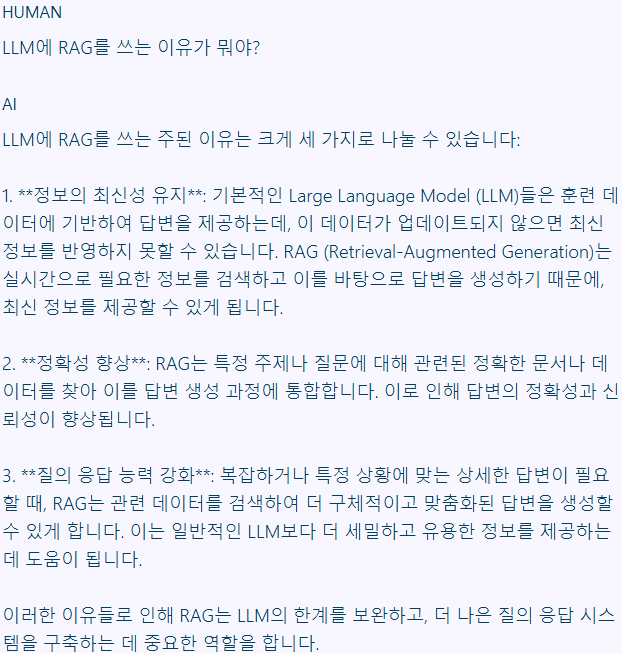

step 9. LLM 을 Runnable로 실행

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langserve import RemoteRunnable

llm = RemoteRunnable("https://radically-top-jaguar.ngrok-free.app/llm/")

prompt = ChatPromptTemplate.from_template(
    "다음의 내용을 SNS 게시글 형식으로 변환해 주세요:\n{input}"
)


chain = prompt | llm | StrOutputParser()
chain.invoke({"input": "저는 딥러닝을 너무나도 사랑합니다."})

'💖✨Deep Learning Enthusiast Alert!✨💖\n\n🌟 "My heart truly beats for Deep Learning! 🧠💖" \n\nEver felt that spark ignite when diving into neural networks? Let\'s share the passion! #DeepLearningLove #AIAdventures #TechPassion  🚀🤖'